In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import acos, degrees

In [2]:
df = pd.read_csv(r'C:\Users\Salvo\Desktop\Ridge\DLC_videos\Videos_to_analyzeDLC\Trajectories.csv')

In [3]:
#pd.read_csv('Trajectories.csv')
#pd.columns = ['bodyparts', 'nose_x', 'nose_y', 'nose_lik', 'tail1_x', 'tail1_y', 'tail1_lik', 'tail2_x', 'tail2_y', 'tail2_lik', 'tail3_x', 'tail3_y', 'tail3_lik' ]
df.rename(columns={'DLC_resnet50_Ridge_walkFeb19shuffle1_100000.3':'tail1_x',
                          'DLC_resnet50_Ridge_walkFeb19shuffle1_100000.4':'tail1_y',
                          'DLC_resnet50_Ridge_walkFeb19shuffle1_100000.6':'tail2_x',
                          'DLC_resnet50_Ridge_walkFeb19shuffle1_100000.7':'tail2_y',
                          'DLC_resnet50_Ridge_walkFeb19shuffle1_100000.9':'tail3_x',
                          'DLC_resnet50_Ridge_walkFeb19shuffle1_100000.10':'tail3_y'}, 
                 inplace=True)

In [4]:
#list(df.columns.values) 

In [5]:
#df[['tail1_x', 'tail1_y']]

In [6]:
#delete first two rows
df.drop([0,1], axis = 0)

,scorer,DLC_resnet50_Ridge_walkFeb19shuffle1_100000,DLC_resnet50_Ridge_walkFeb19shuffle1_100000.1,DLC_resnet50_Ridge_walkFeb19shuffle1_100000.2,tail1_x,tail1_y,DLC_resnet50_Ridge_walkFeb19shuffle1_100000.5,tail2_x,tail2_y,DLC_resnet50_Ridge_walkFeb19shuffle1_100000.8,tail3_x,tail3_y,DLC_resnet50_Ridge_walkFeb19shuffle1_100000.11
2,0,675.50146484375,195.6283721923828,0.8142412900924683,688.6873779296875,136.85757446289062,0.9990854263305664,581.4838256835938,491.7713928222656,0.9996762275695801,612.3875732421875,149.44252014160156,0.9999971389770508
3,1,675.4313354492188,195.75108337402344,0.7971327900886536,688.733154296875,136.8672332763672,0.999137282371521,581.6488037109375,491.6861877441406,0.9997744560241699,612.2582397460938,148.0245819091797,0.9999983310699463
4,2,675.42138671875,195.54295349121094,0.8309528231620789,688.5516967773438,136.64517211914062,0.9992969036102295,581.3485717773438,491.85345458984375,0.9996885061264038,612.4595336914062,148.15003967285156,0.9999978542327881
5,3,675.6117553710938,195.68882751464844,0.7612321376800537,688.7115478515625,136.8863067626953,0.9990220069885254,48.729671478271484,94.30431365966797,0.9997634887695312,612.1246948242188,148.3053741455078,0.9999991655349731
6,4,675.6198120117188,195.86923217773438,0.8014761209487915,688.543212890625,136.67669677734375,0.9993253946304321,581.7503051757812,491.9049072265625,0.9996787309646606,612.9471435546875,148.5638885498047,0.999999463558197
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,1152,170.1455535888672,19.42851448059082,0.8642309904098511,377.530029296875,515.7307739257812,1.0,581.3834228515625,491.82952880859375,0.9998193383216858,695.6536254882812,54.50931167602539,0.9997173547744751
1155,1153,170.18873596191406,19.487529754638672,0.8050062656402588,377.8948974609375,515.5560302734375,1.0,581.2595825195312,491.59759521484375,0.9997990131378174,696.0487670898438,54.51703643798828,0.9997178316116333
1156,1154,170.04006958007812,19.381820678710938,0.7896506786346436,378.99273681640625,515.5814819335938,1.0,581.4376220703125,491.8316955566406,0.9998167753219604,696.2839965820312,54.004764556884766,0.9998978972434998
1157,1155,170.42942810058594,19.36173439025879,0.7792837619781494,379.17156982421875,516.05126953125,1.0,581.1981201171875,491.9642333984375,0.9998142123222351,613.6544799804688,147.75706481933594,0.9998899102210999


<function matplotlib.pyplot.show(*args, **kw)>

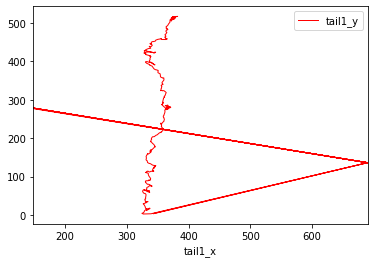

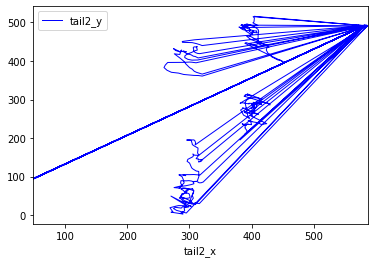

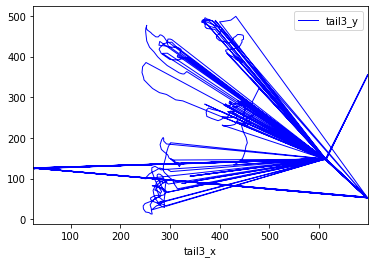

In [7]:
#take just numeric values
df.tail1_x=pd.to_numeric(df.tail1_x[2:])
df.tail1_y=pd.to_numeric(df.tail1_y[2:])
df.tail2_x=pd.to_numeric(df.tail2_x[2:])
df.tail2_y=pd.to_numeric(df.tail2_y[2:])
df.tail3_x=pd.to_numeric(df.tail3_x[2:])
df.tail3_y=pd.to_numeric(df.tail3_y[2:])
#plot tail vs y
df.plot(x='tail1_x',y='tail1_y',color='red', linewidth=1)
df.plot(x='tail2_x',y='tail2_y',color='blue', linewidth=1)
df.plot(x='tail3_x',y='tail3_y',color='blue', linewidth=1)
plt.show

In [8]:
#Replace in tail2 values greater than with nan
#df[df.tail2_x>350] = np.nan
#df[df.tail2_y>200] = np.nan

In [9]:
#df.plot(x='tail2_x',y='tail2_y',color='blue', linewidth=1)

In [10]:
#Compute angles from 3 points
def FindAngle3Points (a,b,c):
#a = np.array([6,0])
#b = np.array([0,0]) this is the vertex of the angle
#c = np.array([0,6])

    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)

    print(np.degrees(angle))

In [11]:
#a = MakePointFromCoord(df.tail1_x, df.tail1_y)
#b = MakePointFromCoord(df.tail2_x, df.tail2_y)
#c = MakePointFromCoord(df.tail3_x, df.tail3_y)

#MakePointFromCoord(df.tail1_x, df.tail1_y, df.tail2_x, df.tail2_y, df.tail3_x, df.tail3_y)

In [12]:
  
# Create Pandas DataFrame 
#import pandas as pd 
  
# Initialise data to lists. 
#data = [{'x1': 1, 'y1': 2, 'x2':3, 'y2': 1, 'x3': 2, 'y3':3}, {'x1': 5, 'y1': 7, 'x2':3, 'y2': 8, 'x3': 2, 'y3':3}, {'x1': 1, 'y1': 7, 'x2':5, 'y2': 8, 'x3': 4, 'y3':3}] 
  
# Creates DataFrame. 
#df = pd.DataFrame(data) 
  
# Print the data 
#df 


In [13]:
#Cmpute angles using 3 poins coordinates (6 values for 2D trajectories), and append as last column of panda dataframe

angles=[]
for i in range(df.shape[0]):
    x1,y1=df.tail1_x[i],df.tail1_y[i]
    x2,y2=df.tail2_x[i],df.tail2_y[i]
    x3,y3=df.tail3_x[i],df.tail3_y[i]
    a=((x3-x1)**2+(y3-y1)**2)**0.5
    b=((x1-x2)**2+(y1-y2)**2)**0.5
    c=((x2-x3)**2+(y2-y3)**2)**0.5

    angle=degrees(acos((b*b+c*c-a*a)/(2.0*b*c)))
    angles.append(round(angle,2))

df['Angles']=angles
df.head()

,scorer,DLC_resnet50_Ridge_walkFeb19shuffle1_100000,DLC_resnet50_Ridge_walkFeb19shuffle1_100000.1,DLC_resnet50_Ridge_walkFeb19shuffle1_100000.2,tail1_x,tail1_y,DLC_resnet50_Ridge_walkFeb19shuffle1_100000.5,tail2_x,tail2_y,DLC_resnet50_Ridge_walkFeb19shuffle1_100000.8,tail3_x,tail3_y,DLC_resnet50_Ridge_walkFeb19shuffle1_100000.11,Angles
0,bodyparts,nose,nose,nose,NaN,NaN,tail1,NaN,NaN,tail2,NaN,NaN,tail3,NaN
1,coords,x,y,likelihood,NaN,NaN,likelihood,NaN,NaN,likelihood,NaN,NaN,likelihood,NaN
2,0,675.50146484375,195.6283721923828,0.8142412900924683,688.687378,136.857574,0.9990854263305664,581.483826,491.771393,0.9996762275695801,612.387573,149.442520,0.9999971389770508,11.65
3,1,675.4313354492188,195.75108337402344,0.7971327900886536,688.733154,136.867233,0.999137282371521,581.648804,491.686188,0.9997744560241699,612.258240,148.024582,0.9999983310699463,11.70
4,2,675.42138671875,195.54295349121094,0.8309528231620789,688.551697,136.645172,0.9992969036102295,581.348572,491.853455,0.9996885061264038,612.459534,148.150040,0.9999978542327881,11.62
